In [31]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

mypath_O1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/O_1T/"
mypath_R1T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/R_1T/"
mypath_O24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/O_24T/"
mypath_R24T                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4D/R_24T/"
def read_files(path):  
    
    # N, E, M in struct [Type, Value, File]
    E = np.zeros(99952* 10)
    
    file_counter = 0
    line_counter = 0
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[3:]
            for line in lines:
                line = line.split()
                E[line_counter] = (float(line[1]))
                line_counter += 1
        file_counter += 1
    
    # N

    return np.array(E)

DO1T = read_files(mypath_O1T)
DR1T = read_files(mypath_R1T)
DO24T = read_files(mypath_O24T)
DR24T = read_files(mypath_R24T)

m_DO1T = np.mean(DO1T) 
m_DO24T = np.mean(DO24T)


std_DO1T = np.std(DO1T)
std_DO24T = np.std(DO24T)


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


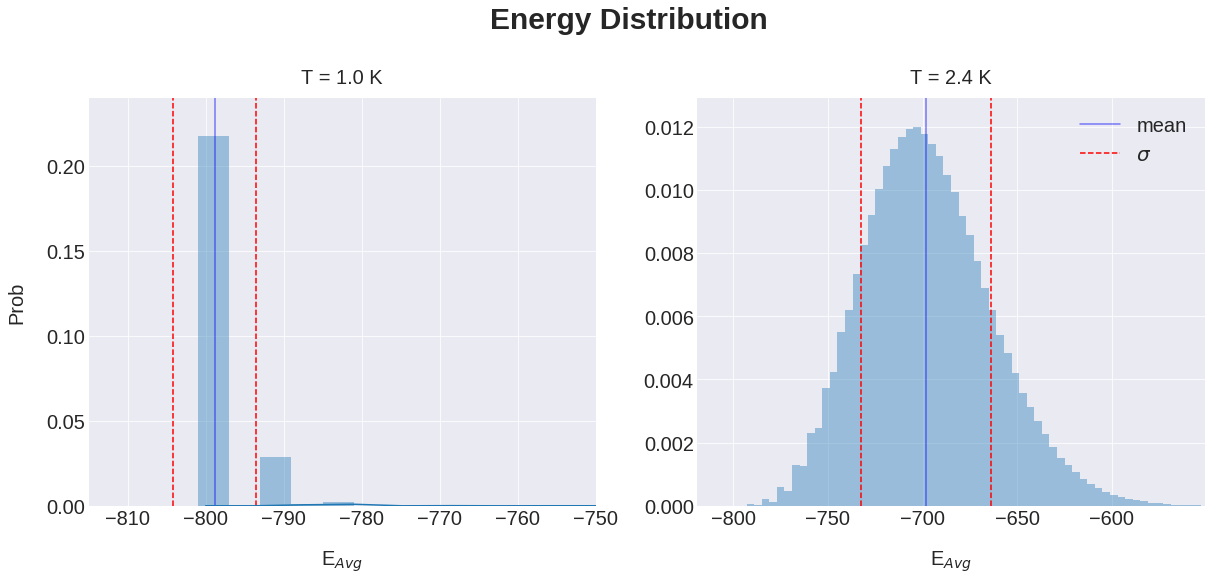

<Figure size 432x288 with 0 Axes>

In [49]:
fsize = 20
fig, axs = plt.subplots(1, 2, figsize = (20,7.5))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Energy Distribution\n',y=1.05, fontsize=fsize +10, fontweight='bold')

newBins = np.arange(-849, -551, 4)

axs[0].set_title('T = 1.0 K', fontsize = fsize, pad = 15)
axs[0].plot([m_DO1T, m_DO1T],[0,0.24], 'b', label = 'mean', alpha = 0.5)
axs[0].plot([ m_DO1T-std_DO1T, m_DO1T-std_DO1T],[0,0.24], '--r', label = '$\sigma$')
axs[0].plot([ m_DO1T+std_DO1T,  m_DO1T+std_DO1T],[0,0.24], '--r')
sns.distplot(DO1T, hist=True, bins = newBins, ax=axs[0]);
axs[0].set_xlim([-815, -750])
axs[0].set_ylim([0,0.24])


axs[1].set_title('T = 2.4 K', fontsize = fsize, pad = 15)
sns.distplot(DO24T, hist=True, bins = newBins, ax=axs[1], kde=False, norm_hist = True);
axs[1].set_xlim([-819, -551])
axs[1].plot([m_DO24T, m_DO24T],[0,0.0129], 'b', label = 'mean', alpha = 0.5)
axs[1].plot([ m_DO24T-std_DO24T, m_DO24T-std_DO24T],[0,0.0129], '--r', label = '$\sigma$')
axs[1].plot([ m_DO24T+std_DO24T,  m_DO24T+std_DO24T],[0,0.0129], '--r')
axs[1].set_ylim([0,0.0129])
plt.legend(fontsize = fsize)
#axs[0, 1].set_title('Ordered T = 2.4 K', fontsize = fsize, pad = 15)
#sns.distplot(DO24T, hist=True, ax=axs[0, 1]);
#axs[0, 1].set_xlim([-849, -551])


#axs[1, 1].set_title('Random T = 2.4 K', fontsize = fsize, pad = 15)
#sns.distplot(DR24T, hist=True, ax=axs[1, 1]);
#axs[1, 1].set_xlim([-849, -551])


axs[0].set_xlabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[1].set_xlabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[0].set_ylabel('Prob', fontsize = fsize, labelpad = 20)
#axs[1, 0].set_ylabel('Prob', fontsize = fsize, labelpad = 20)

axs[0].tick_params(labelsize=fsize)
axs[1].tick_params(labelsize=fsize)
#axs[1, 1].tick_params(labelsize=fsize)
#axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.


plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')

In [41]:
print(std_DO24T)
print(std_DO1T)
print(m_DO24T)
print(m_DO1T)

34.232942118208854
5.325567957522811
-698.1963102289099
-798.8545982071395
